In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


## Data Preprocessing
* Getting data ready to feed it to the neural network

Creating matrix of features X and labels y

In [ ]:
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

Visializing data

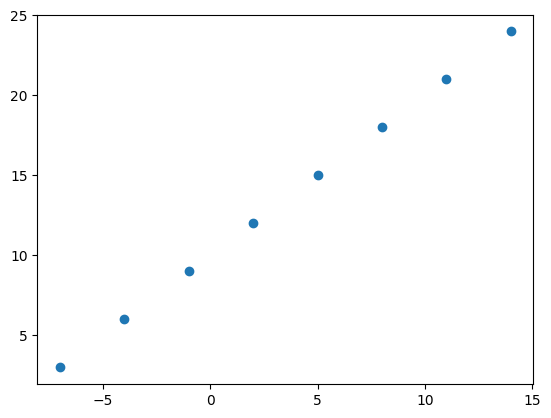

In [ ]:
plt.scatter(X,y)

Input and output shapes

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

# what is this?

((), ())

In [ ]:
# this is because X[0] and y[0] are scalar and have 0 dimention:

X[0].ndim

0

Changing X & y from np.array to tensor

In [ ]:
X = tf.constant(X)
y = tf.constant(y)

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

Expanding dimentions

In [ ]:
X = tf.expand_dims(X, axis=-1) # for tensorflow 2.7.0+
print(tf.__version__)

2.18.0


In [ ]:
X

<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]])>

## Creating and Training model

In [ ]:
model0 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1)
])

model0.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model0.fit(X, y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step - loss: 15.7675 - mae: 15.7675
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 15.4862 - mae: 15.4862
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 15.2050 - mae: 15.2050
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 14.9379 - mae: 14.9379
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 14.8054 - mae: 14.8054


## Making predictions

In [ ]:
test = np.array([[17.0]])
model0.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[-5.860893]], dtype=float32)

## Improving model

* by altering the steps we took to create our model:

1. **Creating model**: add more layers, increase hidden layers, change the activation functions

2. **compiling**: change the optimization function, learning rate of optimization function

3. **fitting model**: increase epochs, increase the amout of data feeded to model

``` Work flow: build a model--> fit it--> evaluate it--> change it--> fit it--> evaluate it--> change it--> ...```

Increasing number of epochs

In [ ]:
# increasing number of epochs from 5 --> 100:

model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1)
])

model1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model1.fit(X, y, epochs=100) # increased num of epochs

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step - loss: 9.2516 - mae: 9.2516
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 9.1191 - mae: 9.1191
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 8.9866 - mae: 8.9866
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 8.8541 - mae: 8.8541
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 8.7216 - mae: 8.7216
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 8.5891 - mae: 8.5891
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 8.4566 - mae: 8.4566
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 8.3241 - mae: 8.3241
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 8.1916 - mae: 8.1916
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 8.0591 - mae: 8.0591
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 7.9266 - mae: 7.9266
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 7.7941 - mae: 7.7941
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/

In [ ]:
model1.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[30.34761]], dtype=float32)

Adding layers:

In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu'), # added this hidden layer
    tf.keras.layers.Dense(1)
])

model2.compile(loss='mae',
              optimizer='sgd',
              metrics=['mae'])

model2.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 865ms/step - loss: 12.5212 - mae: 12.5212
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 11.8709 - mae: 11.8709
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 11.2073 - mae: 11.2073
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 10.5255 - mae: 10.5255
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 9.8289 - mae: 9.8289
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 9.0960 - mae: 9.0960
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 8.3220 - mae: 8.3220
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 7.5034 - mae: 7.5034
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 6.6374 - mae: 6.6374
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 5.7118 - mae: 5.7118
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 4.7170 - mae: 4.7170
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 4.3707 - mae: 4.3707
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [ ]:
model2.predict(test)

# why is this model doing worse considering the fact that we have better loss & mae?
# OVERFITTING!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


array([[32.84841]], dtype=float32)

Changing the number of hidden units:

In [ ]:
# Making a simple and little change to the model:

model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model3.compile(loss='mae',
              optimizer='sgd',
              metrics=['mae'])

model3.fit(X, y, epochs=100)

print("### Prediction ###")
test = np.array([[17.0]])
model3.predict(test)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step - loss: 12.7075 - mae: 12.7075
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 12.1871 - mae: 12.1871
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 11.6611 - mae: 11.6611
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 11.1269 - mae: 11.1269
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 10.5816 - mae: 10.5816
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 10.0225 - mae: 10.0225
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 9.4467 - mae: 9.4467
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 8.8513 - mae: 8.8513
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 8.2331 - mae: 8.2331
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 7.5891 - mae: 7.5891
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 7.2699 - mae: 7.2699
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 7.2509 - mae: 7.2509
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━

array([[28.217962]], dtype=float32)

Changing the optimizer:

In [ ]:
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model4.compile(loss='mae',
              optimizer='adam', # changed optimizer to adam
              metrics=['mae'])

model4.fit(X, y, epochs=100)

print("##################")
print("### Prediction ###")
print("##################")
test = np.array([[17.0]])
model4.predict(test)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.9710 - mae: 13.9710
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 13.9007 - mae: 13.9007
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 13.8304 - mae: 13.8304
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 13.7600 - mae: 13.7600
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 13.6896 - mae: 13.6896
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 13.6191 - mae: 13.6191
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 13.5486 - mae: 13.5486
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 13.4781 - mae: 13.4781
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 13.4075 - mae: 13.4075
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 13.3369 - mae: 13.3369
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 13.2662 - mae: 13.2662
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 13.1954 - mae: 13.1954
Epoch 13/100
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[31.121767]], dtype=float32)

Changing the learning rate

In [ ]:
model5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model5.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

model5.fit(X, y, epochs=100)

print("##################")
print("### Prediction ###")
print("##################")
test = np.array([[17.0]])
model5.predict(test)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.8630 - mae: 13.8630
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - loss: 13.2085 - mae: 13.2085
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - loss: 12.5487 - mae: 12.5487
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 11.8823 - mae: 11.8823
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 11.2079 - mae: 11.2079
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 10.5235 - mae: 10.5235
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 9.8272 - mae: 9.8272
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 9.1171 - mae: 9.1171
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 8.3912 - mae: 8.3912
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 7.6476 - mae: 7.6476
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 6.8841 - mae: 6.8841
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 6.6775 - mae: 6.6775
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[27.542543]], dtype=float32)

In [ ]:
# This is the best prediction so far!
# 🔔 Learning rate is potentially the most important hyperparameter to change.

Fitting on more data

In [ ]:
X2 = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0, 17.0, 20.0, 23.0, 26.0, 29.0])
y2 = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0, 27.0, 30.0, 33.0, 36.0, 39.0])

X2 = tf.constant(X2)
y2 = tf.constant(y2)

X2 = tf.expand_dims(X2, axis=-1)


In [ ]:
model6 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model6.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

model6.fit(X2, y2, epochs=100)

print("##################")
print("### Prediction ###")
print("##################")
test = np.array([[32.0]])
model6.predict(test)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 20.4839 - mae: 20.4839
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 18.5525 - mae: 18.5525
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 16.6170 - mae: 16.6170
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - loss: 14.6673 - mae: 14.6673
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - loss: 12.6934 - mae: 12.6934
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 10.6883 - mae: 10.6883
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 8.6455 - mae: 8.6455
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - loss: 6.5581 - mae: 6.5581
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - loss: 5.4418 - mae: 5.4418
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - loss: 6.1791 - mae: 6.1791
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - loss: 7.1350 - mae: 7.1350
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - loss: 7.7804 - mae: 7.7804
Epoch 13/100
1/1 ━━━━━━━━━━━━━━

array([[40.940235]], dtype=float32)

Making an ultimate model

In [ ]:
model_ultimate = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

model_ultimate.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

model_ultimate.fit(X2, y2, epochs=100)

print("##################")
print("### Prediction ###")
print("##################")
test = np.array([[32.0]])
model_ultimate.predict(test)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 20.8966 - mae: 20.8966
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 14.9231 - mae: 14.9231
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 8.2324 - mae: 8.2324
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 5.9354 - mae: 5.9354
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 8.2550 - mae: 8.2550
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 6.1933 - mae: 6.1933
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 3.9741 - mae: 3.9741
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 6.0310 - mae: 6.0310
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 6.6996 - mae: 6.6996
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 5.5489 - mae: 5.5489
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 3.7132 - mae: 3.7132
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 4.6347 - mae: 4.6347
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/s

array([[42.74877]], dtype=float32)

## Evaluating a model

When it comes to evaluation there are 3 words you should keep in mind:

> "visualize, visualize, visualize"

What should one visualize:

1. the data: what data are we working with?
2. the model itself: what does our model look like?
3. the training process: how does the model perform while it learns?
4. the predictions of a model: how do the predictions of a model line up against the ground truth?

Visualizing data

In [ ]:
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

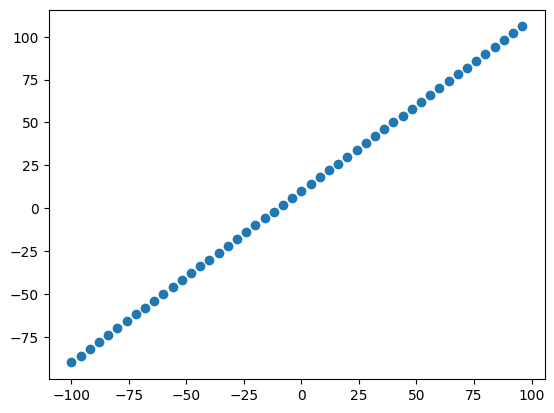

In [ ]:
plt.scatter(X,y)

**The three sets**



1. **Training set**
2. **Validation set**: the model gets tuned on this data, which is typically 10-15% of the data available.
3. **Test set**

> " course material(Training set) --> practice exam(validation set) --> final exam(test set)"

In [ ]:
len(X) # how many samples we have?

50

In [ ]:
X_train = X[:40] #first 40 are training samples(50*0.8=40)
y_train = y[:40]


X_test = X[40:] # lasr 10 are testing samples(50*0.2=10)
y_test = y[40:]

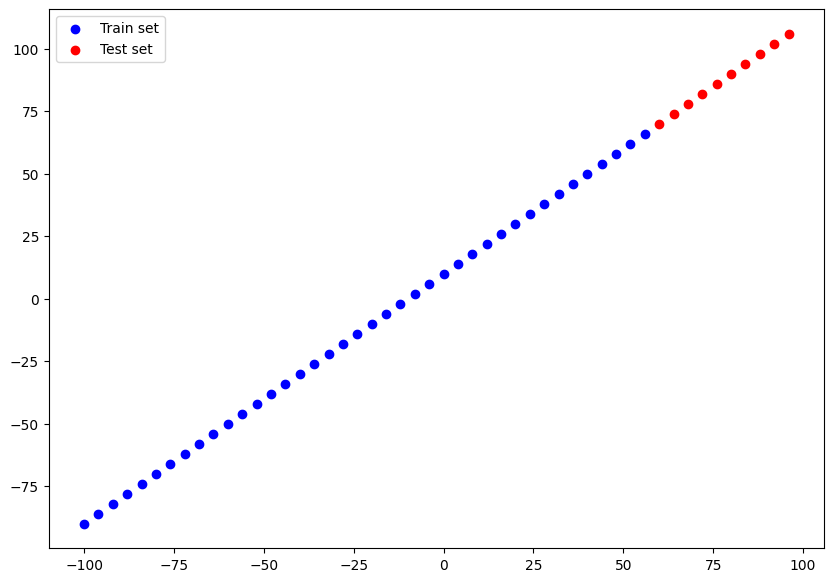

In [ ]:
plt.figure(figsize=(10, 7))

plt.scatter(X_train, y_train, c='b', label='Train set')
plt.scatter(X_test, y_test, c='r', label='Test set')

plt.legend()
plt.show()

In [ ]:
X_train = tf.expand_dims(X_train, axis=-1)

X_train.ndim

2

Visualizing model itselt

Training model using the sets created

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.summary()

# this is not correct. no output shape and no parameter. we will sovle this by
# giving the model the input shape

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X[0], y[0]
# so the input shape is 1 (we are feeding the model 1 number to predict 1 number)

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # defining the input shape
])

# Same as above:
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

**Non-trainable parameters:** These parameters are neither updated nor optimized and remain constant throughout the training. Example: Weights in the max-pooling layers, parameters used in pre-trained models, and transfer learning.

In [ ]:
model.fit(X_train, y_train, epochs=100, verbose=0)

Another way of vizualizing model other that `model.summery()`

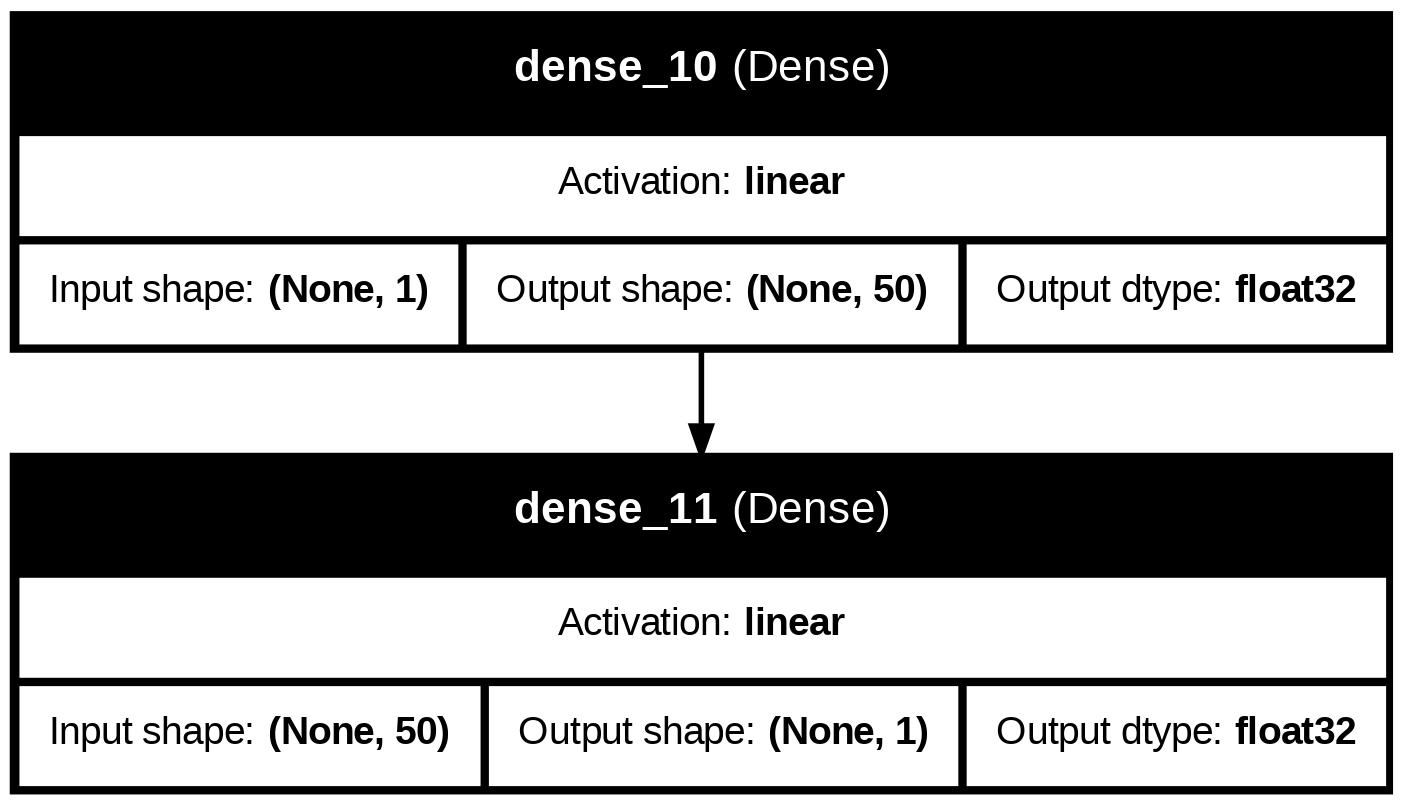

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model6, show_shapes=True, show_layer_names=True, show_layer_activations=True,
           show_dtype=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


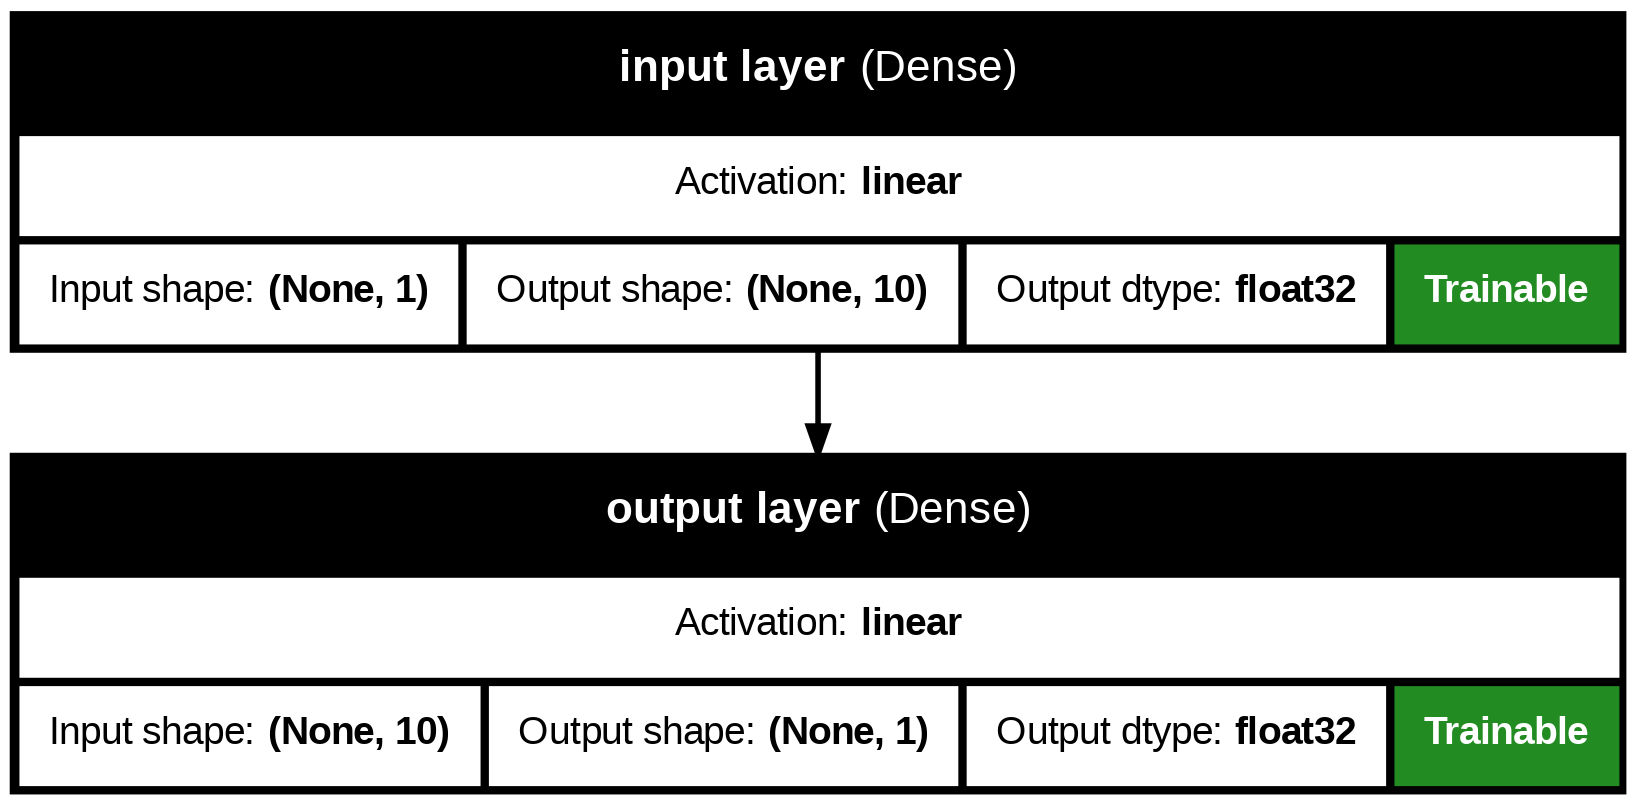

In [ ]:
# lets play with this😈

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input layer'),
    tf.keras.layers.Dense(1, name='output layer')
], name = 'one of my models')

# Same as above:
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
plot_model(model=model,show_shapes=True, show_dtype=True, show_layer_names=True,
           show_layer_activations=True,show_trainable=True)

Visualizing model predictions vs ground truths

In [ ]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


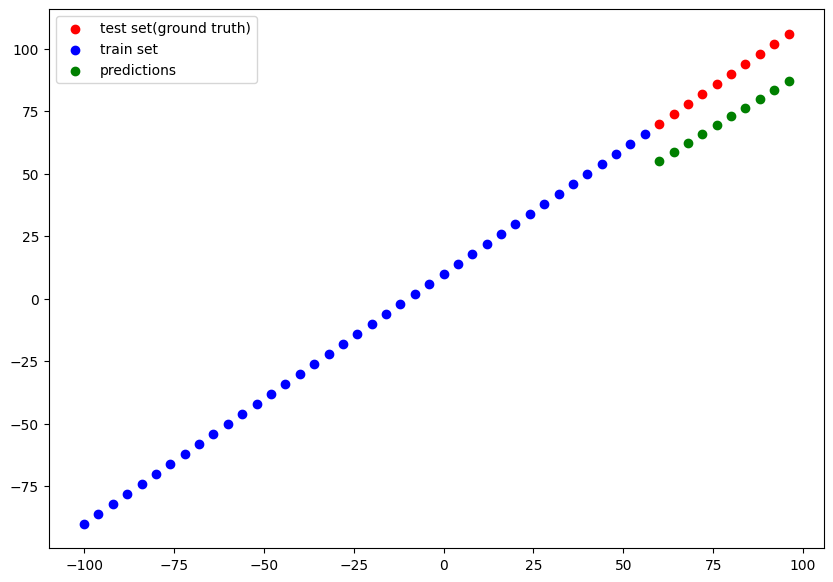

In [ ]:
plt.figure(figsize=(10,7))

plt.scatter(X_test, y_test, c='r', label='test set(ground truth)')
plt.scatter(X_train, y_train, c='b', label='train set')
plt.scatter(X_test, y_pred, c='g', label="predictions")

plt.legend()
plt.show()

Evaluation metrics

In [ ]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 16.8598 - mae: 16.8598


[16.85982322692871, 16.85982322692871]

Mean absolute error

In [ ]:
y_pred = tf.constant(y_pred)
y_pred = tf.squeeze(y_pred)
y_pred

# y_pred and y_test should have the same shape and type(both tensors and both
# with same shape) so that we can calculate mae.

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([55.03634 , 58.61497 , 62.193604, 65.77223 , 69.35086 , 72.92949 ,
       76.508125, 80.086754, 83.66538 , 87.24402 ], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
mae = tf.keras.losses.mae(y_true = y_test,
                                      y_pred = y_pred)

In [ ]:
mae

# in model.evaluate() function above, which number of the output is equal to the
# number given here?

<tf.Tensor: shape=(), dtype=float32, numpy=16.85982322692871>

Mean Square error

In [ ]:
mse = tf.keras.losses.mse(y_true= y_test,
                          y_pred= y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=285.71844482421875>

## Running experiments to improve our model

```
build it --> evaluate it --> tweek it --> build it --> evaluate it --> tweak it --> build it --> ...
```
> **Motto**: Experiment, Experiment, Experiment

🧠 Strat small and add complexity when needed


Three top options:
1. Get more data
2. Make your model larger
3. Train for longer

Based on this 3 we are going to do 3 experiments in this section:
1. `model_1`: same as the oroginal model with 1 layer but trained 100 epochs
2. `model_2`: 2 layers trained for 100 epochs
3. `model_3`: 2 layers trained for 500 epochs

In [ ]:
###################
##### Model_1 #####
###################

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss= tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

model_1.fit(X_train, y_train, epochs= 100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 80.5300 - mae: 80.5300
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 44.7914 - mae: 44.7914
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 15.2043 - mae: 15.2043
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 8.1781 - mae: 8.1781
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 11.0435 - mae: 11.0435
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.4421 - mae: 10.4421
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.3571 - mae: 9.3571
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.1134 - mae: 10.1134
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.3766 - mae: 12.3766
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 15.0703 - mae: 15.0703
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 14.7323 - mae: 14.7323
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10.6632 - mae: 10.6632 
Epoch 13/100
2/2 ━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


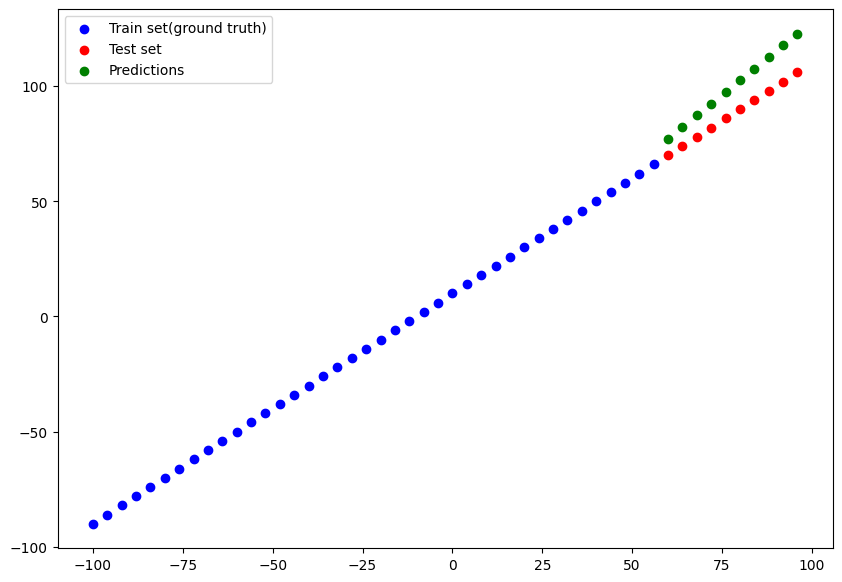

In [ ]:
# make and plot predictions with model 1:

prediction_1 = model_1.predict(X_test)

plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c='b',label= 'Train set(ground truth)')
plt.scatter(X_test,y_test,c='r',label= 'Test set')
plt.scatter(X_test, prediction_1,c='g',label='Predictions')
plt.legend()
plt.show()

In [ ]:
# Evaluating model with evaluation metrics

mae_1 = tf.keras.losses.mae(y_true= y_test,
                            y_pred= tf.squeeze(prediction_1))
mse_1 = tf.keras.losses.mse(y_true= y_test,
                            y_pred= tf.squeeze(prediction_1))
print(f"MAE model_1: {mae_1:.2f}")
print(f"MSE model_1: {mse_1:.2f}")


MAE model_1: 11.98
MSE model_1: 152.76


In [ ]:
###################
##### Model_2 #####
###################

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss= tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics=['mse'])

model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 31.2870 - mse: 1434.6659
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 43.6775 - mse: 2869.8967
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 49.0719 - mse: 3935.8169
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 25.1166 - mse: 909.7900
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 8.6254 - mse: 101.6717
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 18.1592 - mse: 503.9711
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 9.9308 - mse: 111.0059
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 23.0107 - mse: 818.8892 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 8.6252 - mse: 107.8559
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 14.1770 - mse: 268.5301
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 10.3686 - mse: 168.6840
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 8.0932 - mse: 92.1891
Epoch 13/100
2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


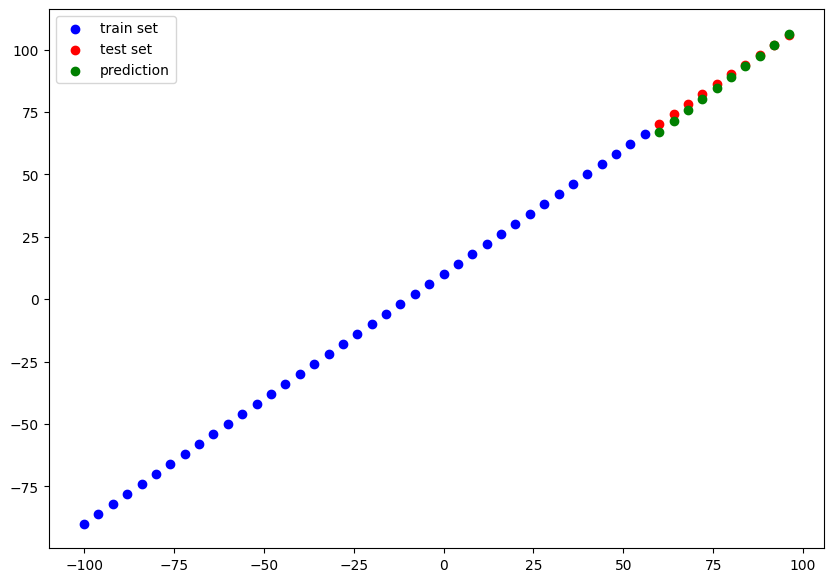

In [ ]:
# Making predictions and visualizing

prediction_2 = model_2.predict(X_test)

plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train,c='b',label='train set')
plt.scatter(X_test,y_test,c='r',label='test set')
plt.scatter(X_test,prediction_2,c='g',label="prediction")
plt.legend()
plt.show()

In [ ]:
# Evaluation metrics

mae_2 = tf.keras.losses.mae(y_true= y_test,
                            y_pred= tf.squeeze(prediction_2))
mse_2 = tf.keras.losses.mse(y_true= y_test,
                            y_pred= tf.squeeze(prediction_2))
print(f'MAE of model_2: {mae_2:.2f}')
print(f'MSE of model_2: {mse_2:.2f}')

MAE of model_2: 1.38
MSE of model_2: 2.81


In [ ]:
###################
##### Model_3 #####
###################

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss= tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics=['mae'])
model_3.fit(X_train, y_train, epochs=500, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


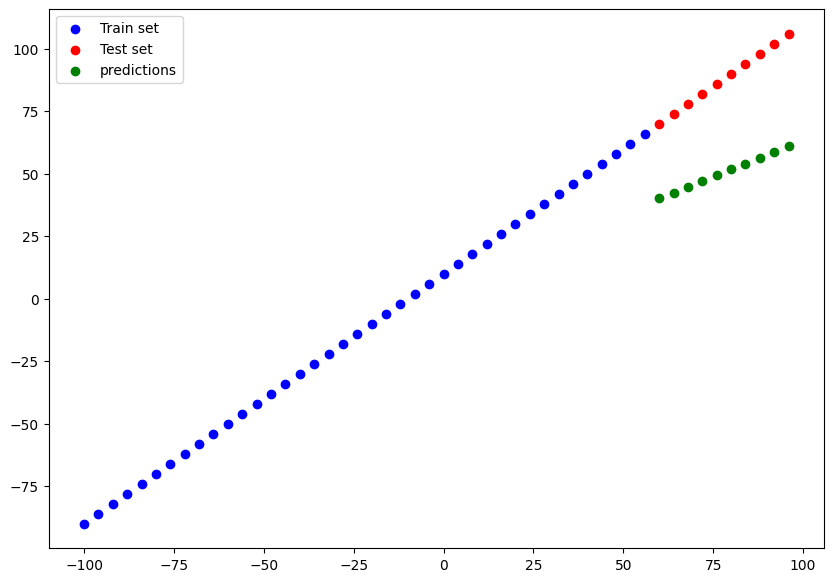

In [ ]:
# Prediction and visualization

prediction_3 = model_3.predict(X_test)

plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c='b',label='Train set')
plt.scatter(X_test,y_test,c='r',label='Test set')
plt.scatter(X_test,prediction_3,c='g',label='predictions')
plt.legend()
plt.show()


# This is called over fitting

In [ ]:
# Evaluation metrics

mae_3 = tf.keras.losses.mae(y_true= y_test,
                            y_pred= tf.squeeze(prediction_3))
mse_3 = tf.keras.losses.mse(y_true= y_test,
                            y_pred= tf.squeeze(prediction_3))
print(f'MAE of model_3: {mae_3:.2f}')
print(f'MSE of model_3: {mse_3:.2f}')

MAE of model_3: 37.41
MSE of model_3: 1422.48


## Comparing results of experiments

We can use a **Pandas Dataframe** to compare our results

In [ ]:
import pandas as pd

In [ ]:
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results,
                           columns= ['Model', 'MAE', 'MSE'])
all_results

,Model,MAE,MSE
0,model_1,11.978767,152.763382
1,model_2,1.378649,2.811977
2,model_3,37.406681,1422.482300


Looks like `model_2` performed the best

In [ ]:
model_2.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153 (616.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

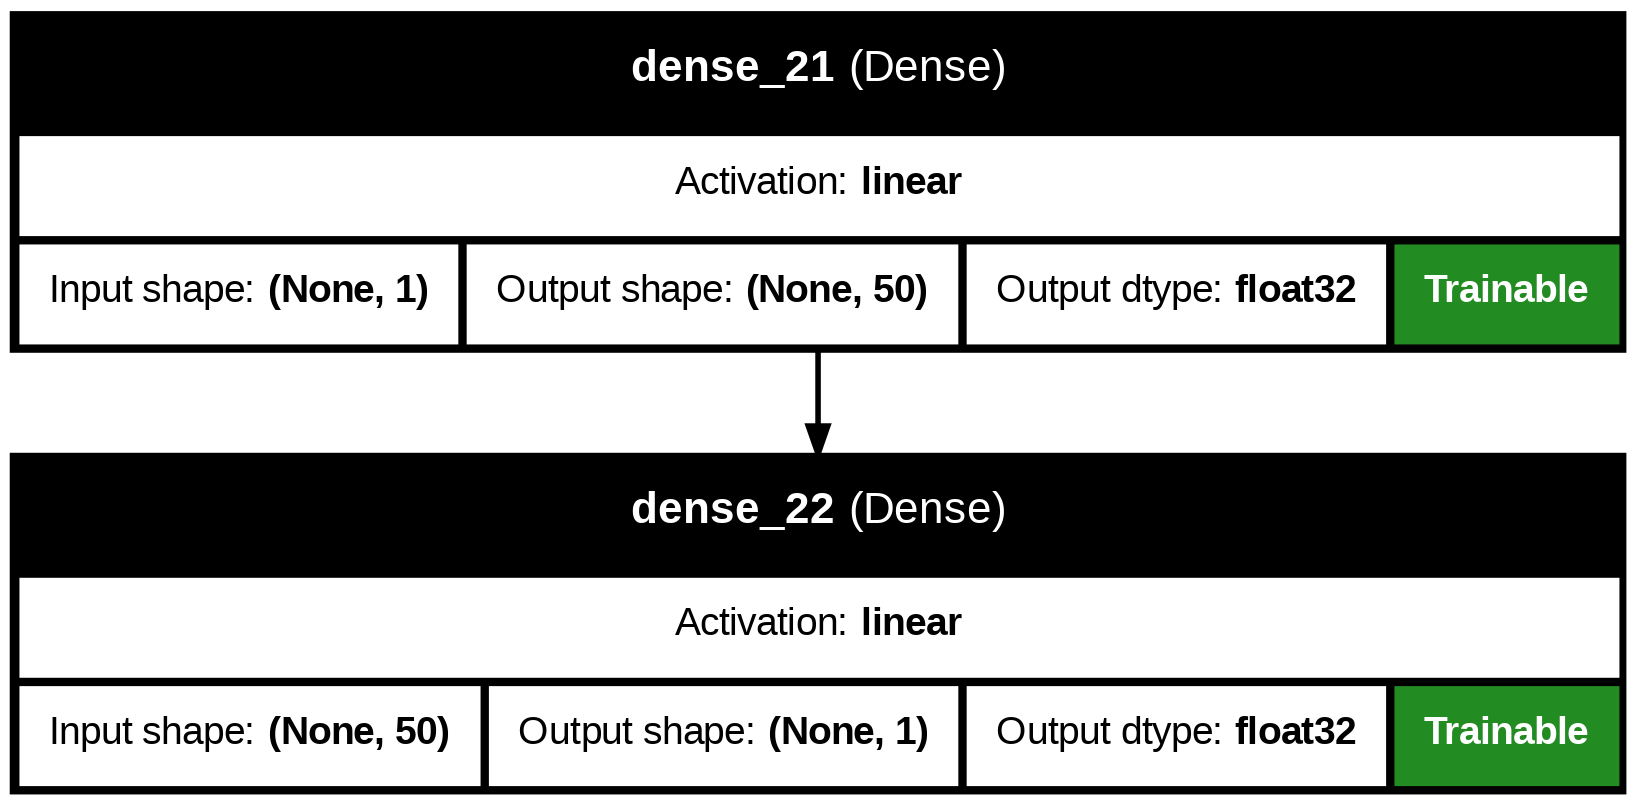

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_2, show_dtype=True, show_shapes=True, show_layer_names=True,
           show_layer_activations=True, show_trainable=True)

## Saving our model

There are 2 main formats we can save our model into:
1. The `SaveModel` format
2. The `HDF5` format
3. The `.keras` format

🧠 the `.keras` format is recommended in Keras 3+ versions.

💡 There are differences between these three methods. See an example summary table bellow


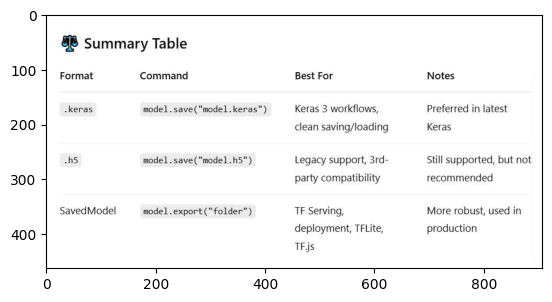

In [ ]:
import cv2
summary_table = cv2.imread('summary.jpg')
plt.imshow(summary_table)

⚖️ Don't use this format. It's old and the error fixing during loading model will make you AGE.

In [ ]:
########################
### SaveModel format ###
########################

model_2.export("The_bestmodel_SaveModel_format")

Saved artifact at 'The_bestmodel_SaveModel_format'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_35')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  138558444412112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138558444420944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138558444412688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138558444419984: TensorSpec(shape=(), dtype=tf.resource, name=None)


📝 Recommended format

In [ ]:
#####################
### .keras format ###
#####################

model_2.save("The_bestmodel_keras_format.keras")

In [ ]:
##################
### .h5 format ###
##################

model_2.save("The_bestmodel_h5_format.h5")

## Loading & Using saved models

🔁 1. Loading a .keras file

In [ ]:
from keras.models import load_model

model_keras = load_model("The_bestmodel_keras_format.keras")

model_keras.evaluate(X_test, y_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step - loss: 1.3786 - mse: 2.8120


[1.378649115562439, 2.811976909637451]

🔁 2. Loading a .h5 file

In [ ]:
from keras.models import load_model

model_h5 = load_model("The_bestmodel_h5_format.h5")

model_h5.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - loss: 1.3786 - mean_squared_error: 2.8120


[1.378649115562439, 2.811976909637451]

🔁 3. Loading a TensorFlow SavedModel

In [ ]:
from keras.layers import TFSMLayer
from keras import Sequential

# Replace "serving_default" with your actual endpoint if it's different
layer = TFSMLayer("/content/The_bestmodel_SaveModel_format", call_endpoint="serving_default")

model_SavedModel = Sequential([layer])